In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%autoreload 2
import pandas as pd
import numpy as np
from data_proc import read_data, filter_data, filter_by_earnigs

In [4]:
# Read the data from github
data = read_data("https://www.dropbox.com/s/xuphq6inwz8npmk/pequiv_long.dta?dl=1")

In [5]:
# Select which columns to keep and how to name them

data_dict = {
        # Identifiers
        'year' : "year",
        'x11101LL' : 'id',
        'd11101' : 'age',
        # Income variables
        "i11113" : "income",

        # Education Information
        "d11108" : "education_resp_HS",
        "d11109" : "education_years",

        # Employment Information
        "e11101" : "anual_work_hours",
        "e11105" : "ocupation",
        "e11106" : "industry_1",
        "e11107" : "industry_2",
        }

In [ ]:
# Filter the data by year and age 
data_filt = filter_data(data, 1978, 1997, data_dict, {'age':[25, 25+35]})
# # Create cohort column
# data_filt["cohort"] = data_filt.year - data_filt.age

In [55]:
data_filt.dropna(subset=["income", "ocupation", "industry_1", "industry_2", "education_resp_HS", "education_years"], inplace = True)
data_filt = data_filt[data_filt.ocupation != "Soldier     101"]
data_filt = data_filt[data_filt.ocupation != "Not Applicable 0"]

In [47]:
data_filt.education_years.value_counts()

12.0    23533
16.0    11206
14.0     6688
17.0     6461
13.0     4753
15.0     2618
11.0     2175
10.0     1634
9.0      1039
8.0       717
7.0       247
6.0       106
4.0        39
5.0        35
3.0        21
2.0        16
1.0         4
Name: education_years, dtype: int64

In [38]:
data_filt.industry_2.value_counts()

Retail          18    7723
Educ./Sport     27    6498
Health Service  28    5982
Other Services  30    4366
Mechanical Eng.  9    3372
Public Admin.   33    3078
Constr. Relate  15    2554
Wholesale       16    2433
Other Trans.    21    2281
Wood/Paper/Print11    2252
Electrical Eng  10    1874
Financial Inst  22    1708
Postal System   20    1597
Agric.,Forestry  1    1579
Legal Services  29    1490
Insurance       23    1457
Service Indust  25    1367
Construction    14    1259
Volunt./Church  31    1244
Energy/Water     3    1204
Clothing/Text.  12    1121
Iron/Steel       8    1088
Food Industry   13     946
Restaurants     24     906
Chemicals        5     657
Synthetics       6     455
Mining           4     374
Priv. Househld  32     340
Earth/Clay/Stone 7     282
Train System    19     204
Fisheries        2      56
Not Applicable   0       0
Social Sec.     34       0
Name: industry_2, dtype: int64

In [16]:
data_filt[data_filt.education_resp_HS == "More than H S  3"]

,year,id,age,income,education_resp_HS,education_years,anual_work_hours,ocupation,industry_1,industry_2
654,1982.0,4172.0,33.0,24697.25,More than H S 3,16.0,3848.0,Priv.Bus.Leadr21,Bank/Insurance 8,Financial Inst 22
655,1992.0,4172.0,43.0,50776.42,More than H S 3,16.0,3240.0,Soldier 101,Services 9,Public Admin. 33
657,1994.0,4172.0,45.0,82700.34,More than H S 3,16.0,2178.0,Soldier 101,Services 9,Public Admin. 33
659,1995.0,4172.0,46.0,74057.17,More than H S 3,16.0,2730.0,NaN,NaN,NaN
660,1987.0,4172.0,38.0,47438.25,More than H S 3,16.0,4480.0,Soldier 101,Services 9,Public Admin. 33
...,...,...,...,...,...,...,...,...,...,...
439869,1997.0,3420002.0,40.0,NaN,More than H S 3,16.0,NaN,Not Applicable 0,Not Applicable 0,Not Applicable 0
439910,1997.0,3422001.0,34.0,NaN,More than H S 3,17.0,1735.0,Not Applicable 0,Not Applicable 0,Not Applicable 0
439944,1997.0,3423001.0,46.0,8800.00,More than H S 3,17.0,4320.0,NaN,NaN,NaN
439955,1997.0,3423002.0,46.0,8800.00,More than H S 3,17.0,2880.0,NaN,NaN,NaN


In [41]:
summary = data_filt.groupby("industry_2").agg({
    "income" : np.mean,
    "education_years" : np.mean,
    "education_resp_HS" : lambda x : 0 if len(x) == 0 else sum(x == "More than H S  3") / len(x)    
    }).sort_values("income")

In [42]:
summary.dropna(inplace=True)
summary

,income,education_years,education_resp_HS
industry_2,,,
Priv. Househld 32,22158.733363,11.665681,0.188235
Restaurants 24,24896.831239,12.334073,0.310155
Clothing/Text. 12,25816.443211,11.970510,0.247101
"Agric.,Forestry 1",28774.330006,12.773046,0.434452
Volunt./Church 31,30801.681111,14.228410,0.684887
Retail 18,31181.730240,12.811880,0.396478
Train System 19,32914.666422,12.529411,0.264706
Iron/Steel 8,33204.905078,12.284268,0.308824
Wood/Paper/Print11,33276.583147,12.844573,0.371670


<AxesSubplot:xlabel='education_years', ylabel='income'>

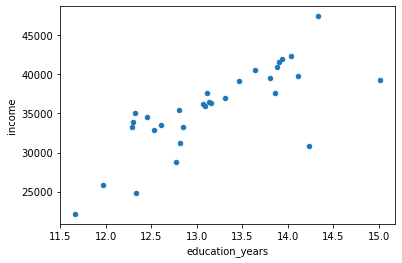

In [43]:
summary.plot.scatter( "education_years", "income")

In [44]:
from scipy.stats.stats import pearsonr   

pearsonr(summary.income, summary.education_resp_HS, )

(0.7318575140575514, 2.8897388566542537e-06)

In [45]:
np.corrcoef(summary.income, summary.education_resp_HS, )

array([[1.        , 0.73185751],
       [0.73185751, 1.        ]])

<AxesSubplot:xlabel='education_resp_HS', ylabel='income'>

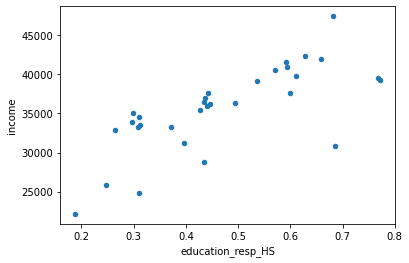

In [46]:
summary.plot.scatter( "education_resp_HS", "income")

In [56]:
data_filt.to_csv("/home/mitch34/Work/ECON-810-Final-Project/data/data_filt.csv", index=False)